<a href="https://colab.research.google.com/github/Ojotitus/AI-invasion/blob/main/OLALERE_3RD_SUBMISSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install catboost
#IMPORTING OF LAB
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn 

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split  

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train = pd.read_csv("/content/drive/MyDrive/DSN_TASK 1/Train.csv")
test = pd.read_csv("/content/drive/MyDrive/DSN_TASK 1/Test.csv")
sub = pd.read_csv("/content/drive/MyDrive/DSN_TASK 1/SampleSubmission.csv")

In [6]:
train.head(10)

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.20,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.50,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.20,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.80,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.60,Nigerian Used,"125,206"
5,VHL19996,Lagos,Toyota,Venza V6,"2,011",Black,7.50,Foreign Used,NaN
6,VHL16314,Lagos,Lexus,LX 570 AWD,"2,019",Black,79.00,Foreign Used,NaN
7,VHL14299,Abuja,Toyota,Avalon,"2,015",Gold,9.00,Foreign Used,NaN
8,VHL15637,Lagos,Toyota,Sienna,"2,012",Blue,7.76,Foreign Used,"350,882"
9,VHL15752,Ibadan,Mercedes-Benz,C240 Matt,"2,004",Black,2.50,Foreign Used,"179,638"


In [7]:
test.head(10)

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL18518,Abuja,BMW,323i,"2,008",White,Foreign Used,30524.0
1,VHL17149,Lagos,Toyota,Camry,"2,013",White,Foreign Used,NaN
2,VHL10927,Lagos,Toyota,Highlander Limited V6,"2,005",Gold,Foreign Used,NaN
3,VHL12909,Lagos,Toyota,Camry,"2,011",Gray,Foreign Used,166839.0
4,VHL12348,Lagos,Lexus,ES 350 FWD,"2,013",Red,Foreign Used,88862.0
5,VHL10798,Lagos,Mercedes-Benz,GLE-Class,"2,017",Black,Foreign Used,69843.0
6,VHL11022,Abuja,Toyota,Sienna LE 4dr,"1,999",Gold,Foreign Used,97000.0
7,VHL12206,Lagos,Lexus,ES 350,"2,011",Red,Foreign Used,NaN
8,VHL11697,Abuja,Honda,CR-V,"2,017",White,Foreign Used,80677.0
9,VHL12313,Lagos,Toyota,Camry,"2,013",Black,Foreign Used,NaN


In [8]:
train.isnull().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

In [9]:
train = train[~train["Amount (Million Naira)"].isnull()].reset_index(drop=True)

In [10]:
train.head(10)

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.20,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.50,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.20,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.80,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.60,Nigerian Used,"125,206"
5,VHL19996,Lagos,Toyota,Venza V6,"2,011",Black,7.50,Foreign Used,NaN
6,VHL16314,Lagos,Lexus,LX 570 AWD,"2,019",Black,79.00,Foreign Used,NaN
7,VHL14299,Abuja,Toyota,Avalon,"2,015",Gold,9.00,Foreign Used,NaN
8,VHL15637,Lagos,Toyota,Sienna,"2,012",Blue,7.76,Foreign Used,"350,882"
9,VHL15752,Ibadan,Mercedes-Benz,C240 Matt,"2,004",Black,2.50,Foreign Used,"179,638"


In [11]:
train = train.drop("VehicleID", axis=1)
test = test.drop("VehicleID", axis=1)
train.head()

,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [12]:
train.isnull().sum()

Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)       0
Type                       196
Distance                  2352
dtype: int64

In [13]:
train.Location.value_counts()

Lagos     3310
Abuja     3254
Ibadan     624
Name: Location, dtype: int64

In [14]:
dummies = pd.get_dummies (train["Location"]) #get the dummies
train = pd.concat([dummies,train], axis=1) # join it to the trainset
train = train.drop("Location", axis=1) #drop it, you don't need it again


# Do the same for test

dummies = pd.get_dummies (test["Location"]) #get the dummies
test = pd.concat([dummies,test], axis=1) # join it to the testset
test = test.drop("Location", axis=1) #drop it, you don't need it again

In [15]:
train.head(10)

,Abuja,Ibadan,Lagos,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,1,0,0,Honda,Accord Coupe EX V-6,"2,011",Silver,2.20,Nigerian Used,NaN
1,0,1,0,Hyundai,Sonata,"2,012",Silver,3.50,Nigerian Used,"125,000"
2,0,0,1,Lexus,RX 350,"2,010",Red,9.20,Foreign Used,"110,852"
3,1,0,0,Mercedes-Benz,GLE-Class,"2,017",Blue,22.80,Foreign Used,"30,000"
4,0,1,0,Toyota,Highlander,"2,002",Red,2.60,Nigerian Used,"125,206"
5,0,0,1,Toyota,Venza V6,"2,011",Black,7.50,Foreign Used,NaN
6,0,0,1,Lexus,LX 570 AWD,"2,019",Black,79.00,Foreign Used,NaN
7,1,0,0,Toyota,Avalon,"2,015",Gold,9.00,Foreign Used,NaN
8,0,0,1,Toyota,Sienna,"2,012",Blue,7.76,Foreign Used,"350,882"
9,0,1,0,Mercedes-Benz,C240 Matt,"2,004",Black,2.50,Foreign Used,"179,638"


In [16]:
train.Maker.value_counts()

Toyota           2738
Lexus            1596
Mercedes-Benz    1211
Honda             357
Hyundai           160
Acura             154
Land Rover        124
Ford              120
BMW               110
Nissan            101
Peugeot            75
Kia                66
Volkswagen         54
Pontiac            30
Mazda              28
Dodge              24
Audi               23
Mitsubishi         22
Chevrolet          20
Infiniti           18
Jeep               18
Jaguar             12
Rolls-Royce        10
Mini                9
GMC                 8
Suzuki              8
Cadillac            7
Scion               7
Volvo               7
Porsche             7
Bentley             6
Maserati            6
Lincoln             6
Buick               5
Chrysler            4
Opel                4
Lamborghini         4
Renault             3
Fiat                3
Subaru              2
Citroen             2
GAC                 2
Saturn              2
JAC                 2
Rover               2
Hummer    

In [17]:
train.Maker = train.Maker.astype("category") # convert to category type
train.Maker = train.Maker.cat.codes # tell pandas to encode it as numbers/codes


# Do the same for Test set


test.Maker = test.Maker.astype("category") # convert to category type
test.Maker = test.Maker.cat.codes # tell pandas to encode it as numbers/codes

In [18]:
train.head(10)

,Abuja,Ibadan,Lagos,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,1,0,0,17,Accord Coupe EX V-6,"2,011",Silver,2.20,Nigerian Used,NaN
1,0,1,0,19,Sonata,"2,012",Silver,3.50,Nigerian Used,"125,000"
2,0,0,1,29,RX 350,"2,010",Red,9.20,Foreign Used,"110,852"
3,1,0,0,34,GLE-Class,"2,017",Blue,22.80,Foreign Used,"30,000"
4,0,1,0,52,Highlander,"2,002",Red,2.60,Nigerian Used,"125,206"
5,0,0,1,52,Venza V6,"2,011",Black,7.50,Foreign Used,NaN
6,0,0,1,29,LX 570 AWD,"2,019",Black,79.00,Foreign Used,NaN
7,1,0,0,52,Avalon,"2,015",Gold,9.00,Foreign Used,NaN
8,0,0,1,52,Sienna,"2,012",Blue,7.76,Foreign Used,"350,882"
9,0,1,0,34,C240 Matt,"2,004",Black,2.50,Foreign Used,"179,638"


In [19]:
train.Model = train.Model.astype("category") # convert to category type
train.Model = train.Model.cat.codes # tell pandas to encode it as numbers/codes

#Do the same for Test

test.Model = test.Model.astype("category") # convert to category type
test.Model = test.Model.cat.codes # tell pandas to encode it as numbers/codes

In [20]:
train.head(10)

,Abuja,Ibadan,Lagos,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,1,0,0,17,116,"2,011",Silver,2.20,Nigerian Used,NaN
1,0,1,0,19,1047,"2,012",Silver,3.50,Nigerian Used,"125,000"
2,0,0,1,29,906,"2,010",Red,9.20,Foreign Used,"110,852"
3,1,0,0,34,506,"2,017",Blue,22.80,Foreign Used,"30,000"
4,0,1,0,52,567,"2,002",Red,2.60,Nigerian Used,"125,206"
5,0,0,1,52,1142,"2,011",Black,7.50,Foreign Used,NaN
6,0,0,1,29,673,"2,019",Black,79.00,Foreign Used,NaN
7,1,0,0,52,157,"2,015",Gold,9.00,Foreign Used,NaN
8,0,0,1,52,1013,"2,012",Blue,7.76,Foreign Used,"350,882"
9,0,1,0,34,210,"2,004",Black,2.50,Foreign Used,"179,638"


In [21]:
train.Colour.value_counts()

Black       2118
Gray        1152
Silver      1120
White       1018
Blue         553
Red          478
Gold         356
Green        179
Brown        114
Burgandy      26
Beige         25
Purple        16
Orange        11
Yellow         7
Pink           7
Ivory          3
Violet         1
G              1
Teal           1
Mica           1
Pearl          1
Name: Colour, dtype: int64

In [23]:
train.Colour = train.Colour.astype("category") # convert to category type
train.Colour = train.Colour.cat.codes # tell pandas to encode it as numbers/codes

#Do the same for Test

test.Colour = test.Colour.astype("category") # convert to category type
test.Colour = test.Colour.cat.codes # tell pandas to encode it as numbers/codes

In [24]:
train.head(10)

,Abuja,Ibadan,Lagos,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,1,0,0,17,116,"2,011",16,2.20,Nigerian Used,NaN
1,0,1,0,19,1047,"2,012",16,3.50,Nigerian Used,"125,000"
2,0,0,1,29,906,"2,010",15,9.20,Foreign Used,"110,852"
3,1,0,0,34,506,"2,017",2,22.80,Foreign Used,"30,000"
4,0,1,0,52,567,"2,002",15,2.60,Nigerian Used,"125,206"
5,0,0,1,52,1142,"2,011",1,7.50,Foreign Used,NaN
6,0,0,1,29,673,"2,019",1,79.00,Foreign Used,NaN
7,1,0,0,52,157,"2,015",6,9.00,Foreign Used,NaN
8,0,0,1,52,1013,"2,012",2,7.76,Foreign Used,"350,882"
9,0,1,0,34,210,"2,004",1,2.50,Foreign Used,"179,638"


In [25]:
train.Type.value_counts()

Foreign Used     4886
Nigerian Used    1889
Brand New         217
Name: Type, dtype: int64

In [26]:
train.Type = train.Type.map({"Nigerian Used": 0,"Foreign Used": 1, "Brand New": 2})


# Do the same for test

test.Type = test.Type.map({"Nigerian Used": 0,"Foreign Used": 1, "Brand New": 2})

In [27]:
train.head(10)

,Abuja,Ibadan,Lagos,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,1,0,0,17,116,"2,011",16,2.20,0.0,NaN
1,0,1,0,19,1047,"2,012",16,3.50,0.0,"125,000"
2,0,0,1,29,906,"2,010",15,9.20,1.0,"110,852"
3,1,0,0,34,506,"2,017",2,22.80,1.0,"30,000"
4,0,1,0,52,567,"2,002",15,2.60,0.0,"125,206"
5,0,0,1,52,1142,"2,011",1,7.50,1.0,NaN
6,0,0,1,29,673,"2,019",1,79.00,1.0,NaN
7,1,0,0,52,157,"2,015",6,9.00,1.0,NaN
8,0,0,1,52,1013,"2,012",2,7.76,1.0,"350,882"
9,0,1,0,34,210,"2,004",1,2.50,1.0,"179,638"


In [28]:
train.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7188 entries, 0 to 7187
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Abuja                   7188 non-null   uint8  
 1   Ibadan                  7188 non-null   uint8  
 2   Lagos                   7188 non-null   uint8  
 3   Maker                   7188 non-null   int8   
 4   Model                   7188 non-null   int16  
 5   Year                    7167 non-null   object 
 6   Colour                  7188 non-null   int8   
 7   Amount (Million Naira)  7188 non-null   float64
 8   Type                    6992 non-null   float64
 9   Distance                4836 non-null   object 
dtypes: float64(2), int16(1), int8(2), object(2), uint8(3)
memory usage: 273.9+ KB


In [29]:
train.Year.value_counts

<bound method IndexOpsMixin.value_counts of 0       2,011
1       2,012
2       2,010
3       2,017
4       2,002
        ...  
7183    2,018
7184    2,007
7185    2,010
7186    2,012
7187    2,012
Name: Year, Length: 7188, dtype: object>

In [30]:
# see an example of repairing one of the number, there are 1 billion ways to do this
"".join("2,012".split(",")) #see an example

'2012'

In [32]:
train.Year = [("".join(str(i).split(","))) for i in train.Year]
train.Distance = [("".join(str(i).split(","))) for i in train.Year]


# Do for test

test.Year = [("".join(str(i).split(","))) for i in test.Year]
test.Distance = [("".join(str(i).split(","))) for i in test.Year]


In [33]:
train.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7188 entries, 0 to 7187
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Abuja                   7188 non-null   uint8  
 1   Ibadan                  7188 non-null   uint8  
 2   Lagos                   7188 non-null   uint8  
 3   Maker                   7188 non-null   int8   
 4   Model                   7188 non-null   int16  
 5   Year                    7188 non-null   object 
 6   Colour                  7188 non-null   int8   
 7   Amount (Million Naira)  7188 non-null   float64
 8   Type                    6992 non-null   float64
 9   Distance                7188 non-null   object 
dtypes: float64(2), int16(1), int8(2), object(2), uint8(3)
memory usage: 273.9+ KB


In [34]:
train.Year = pd.to_numeric(train.Year, errors = "coerce")
train.Distance = pd.to_numeric(train.Distance, errors = "coerce")


#Do for test

test.Year = pd.to_numeric(test.Year, errors = "coerce")
test.Distance = pd.to_numeric(test.Distance, errors = "coerce")

In [35]:
train.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7188 entries, 0 to 7187
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Abuja                   7188 non-null   uint8  
 1   Ibadan                  7188 non-null   uint8  
 2   Lagos                   7188 non-null   uint8  
 3   Maker                   7188 non-null   int8   
 4   Model                   7188 non-null   int16  
 5   Year                    7167 non-null   float64
 6   Colour                  7188 non-null   int8   
 7   Amount (Million Naira)  7188 non-null   float64
 8   Type                    6992 non-null   float64
 9   Distance                7167 non-null   float64
dtypes: float64(4), int16(1), int8(2), uint8(3)
memory usage: 273.9 KB


In [36]:
train.head(10)

,Abuja,Ibadan,Lagos,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,1,0,0,17,116,2011.0,16,2.20,0.0,2011.0
1,0,1,0,19,1047,2012.0,16,3.50,0.0,2012.0
2,0,0,1,29,906,2010.0,15,9.20,1.0,2010.0
3,1,0,0,34,506,2017.0,2,22.80,1.0,2017.0
4,0,1,0,52,567,2002.0,15,2.60,0.0,2002.0
5,0,0,1,52,1142,2011.0,1,7.50,1.0,2011.0
6,0,0,1,29,673,2019.0,1,79.00,1.0,2019.0
7,1,0,0,52,157,2015.0,6,9.00,1.0,2015.0
8,0,0,1,52,1013,2012.0,2,7.76,1.0,2012.0
9,0,1,0,34,210,2004.0,1,2.50,1.0,2004.0


In [37]:
train.isnull().sum()

Abuja                       0
Ibadan                      0
Lagos                       0
Maker                       0
Model                       0
Year                       21
Colour                      0
Amount (Million Naira)      0
Type                      196
Distance                   21
dtype: int64

In [38]:
train = train.fillna(train.median())

test = test.fillna(test.median())

In [39]:
train.isnull().sum()

Abuja                     0
Ibadan                    0
Lagos                     0
Maker                     0
Model                     0
Year                      0
Colour                    0
Amount (Million Naira)    0
Type                      0
Distance                  0
dtype: int64

In [41]:
#MODELLING
catboost_model = CatBoostRegressor() #use catboost
lightgbm_model= LGBMRegressor() #use lightgbm

In [42]:
target = train["Amount (Million Naira)"]
train = train.drop("Amount (Million Naira)", axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(train,target,test_size=0.1)

In [43]:
#USING CATBOOST MODEL
catboost_model.fit(X_train, Y_train) 

Learning rate set to 0.054991
0:	learn: 24.1424368	total: 67.5ms	remaining: 1m 7s
1:	learn: 23.5126304	total: 70.1ms	remaining: 35s
2:	learn: 22.8696768	total: 76.4ms	remaining: 25.4s
3:	learn: 22.2560951	total: 95.1ms	remaining: 23.7s
4:	learn: 21.7244637	total: 102ms	remaining: 20.3s
5:	learn: 21.1936703	total: 111ms	remaining: 18.3s
6:	learn: 20.6717090	total: 119ms	remaining: 16.9s
7:	learn: 20.1800588	total: 127ms	remaining: 15.7s
8:	learn: 19.7260914	total: 136ms	remaining: 14.9s
9:	learn: 19.3144449	total: 138ms	remaining: 13.7s
10:	learn: 18.9440631	total: 147ms	remaining: 13.3s
11:	learn: 18.5751341	total: 150ms	remaining: 12.3s
12:	learn: 18.2173286	total: 154ms	remaining: 11.7s
13:	learn: 17.8730764	total: 164ms	remaining: 11.5s
14:	learn: 17.5627295	total: 171ms	remaining: 11.3s
15:	learn: 17.2880841	total: 174ms	remaining: 10.7s
16:	learn: 17.0329386	total: 179ms	remaining: 10.3s
17:	learn: 16.7706668	total: 188ms	remaining: 10.2s
18:	learn: 16.5172559	total: 192ms	remaini

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
mean_squared_error(Y_test, catboost_model.predict(X_test))

233.7042003816323

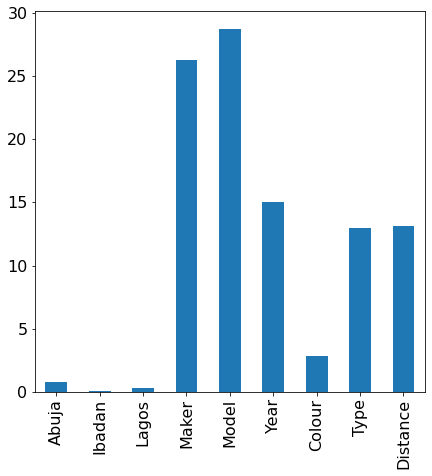

In [46]:
pd.Series(catboost_model.feature_importances_, index= X_train.columns).plot(kind="bar",figsize=(7, 7), fontsize=16)

In [47]:
answers = catboost_model.predict(test)

In [48]:
sub01 = sub.copy()

In [49]:
sub01.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,1.0
1,VHL17149,1.0
2,VHL10927,1.0
3,VHL12909,1.0
4,VHL12348,1.0


In [50]:
sub01["Amount (Million Naira)"] = answers

In [51]:
sub01.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,2.870613
1,VHL17149,7.796832
2,VHL10927,2.395186
3,VHL12909,5.383982
4,VHL12348,5.148820


In [55]:
#put your preferred name with dot csv
sub01.to_csv("/content/drive/MyDrive/DSN_TASK 1/OLALERE_3RD_SUBMISSION.csv", index = False)